In [1]:
import sys
from torchvision.datasets import MNIST, FashionMNIST
import matplotlib.pyplot as plt

sys.path.append('/content/drive/MyDrive/FF')
from trainer import FCTrainer, RFTrainer

# MNIST

In [2]:
train_set = MNIST('./data/', train=True, download=True)
test_set = MNIST('./data/', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 128807098.58it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 17642833.36it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 77175090.63it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4469856.59it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Create negative datas


100%|██████████| 60000/60000 [00:23<00:00, 2503.94it/s]



[Start training FF-Layers]
Training 0 ff-layer


100%|██████████| 100/100 [01:09<00:00,  1.44it/s, Loss=0.186]


Training 1 ff-layer


100%|██████████| 100/100 [01:34<00:00,  1.06it/s, Loss=0.116]


Training 2 ff-layer


100%|██████████| 100/100 [01:36<00:00,  1.03it/s, Loss=0.127]


Training 3 ff-layer


100%|██████████| 100/100 [01:38<00:00,  1.01it/s, Loss=0.117]



[Start training Softmax-Layer]


100%|██████████| 100/100 [01:00<00:00,  1.66it/s, Loss=0.0182, Acc=0.999]


[Test]
test error:  0.032100021839141846


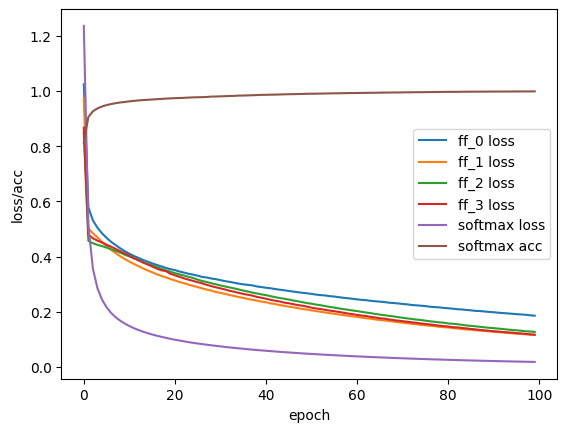

In [3]:
# Fully-connected layers

trainer = FCTrainer(
    train_set=train_set,
    ff_dims=[784, 2000, 2000, 2000, 2000],
    out_dim=10,
    threshold=10,
    lr=0.001,
    batch_size=1000,
    epochs=100,
    dropout=0,
    device='cuda:0'
    )

# train
trainer.train()

# test
trainer.test(test_set)

# loss / acc
plt.xlabel('epoch')
plt.ylabel('loss/acc')
for i, row in enumerate(trainer.ffnn_his):
  plt.plot(row, label=f'ff_{i} loss')
plt.plot(trainer.softmax_his['loss'], label='softmax loss')
plt.plot(trainer.softmax_his['acc'], label='softmax acc')
plt.legend()

Create negative datas


100%|██████████| 60000/60000 [00:24<00:00, 2421.28it/s]



[Start training FF-Layers]
Training 0 ff-layer


100%|██████████| 60/60 [00:45<00:00,  1.31it/s, Loss=0.619]


Training 1 ff-layer


100%|██████████| 60/60 [00:51<00:00,  1.17it/s, Loss=0.514]


Training 2 ff-layer


100%|██████████| 60/60 [00:52<00:00,  1.15it/s, Loss=0.21]



[Start training Softmax-Layer]


100%|██████████| 60/60 [00:32<00:00,  1.82it/s, Loss=0.032, Acc=0.99]

[Test]
test error:  0.031800031661987305


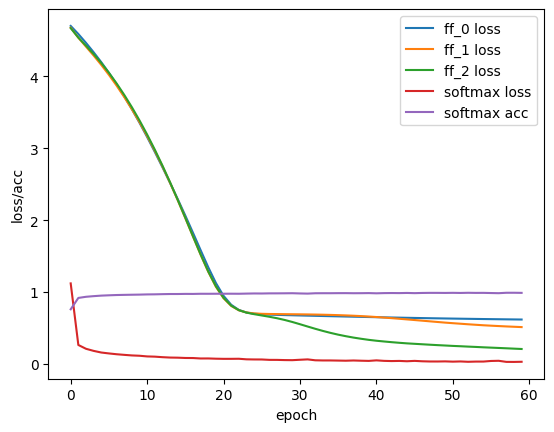

In [4]:
# Local receptive field without weight sharing

trainer = RFTrainer(
    train_set=train_set,
    out_channel_list=[128, 220, 512],
    input_shape_list=[(1, 28, 28), (128, 4, 4), (220, 3, 3)], 
    kernel_size_list=[(10, 10), (2, 2), (2, 2)], 
    strides_list=[(6, 6), (1, 1), (1, 1)],
    out_dim=10,
    threshold=10, 
    lr=0.001, 
    batch_size=1000, 
    epochs=60, 
    dropout=0, 
    device='cuda:0'
    )

trainer.train()

trainer.test(test_set)

plt.xlabel('epoch')
plt.ylabel('loss/acc')
for i, row in enumerate(trainer.ffnn_his):
  plt.plot(row, label=f'ff_{i} loss')
plt.plot(trainer.softmax_his['loss'], label='softmax loss')
plt.plot(trainer.softmax_his['acc'], label='softmax acc')
plt.legend()

# FashionMNIST

In [5]:
train_set = FashionMNIST('./data/', train=True, download=True)
test_set = FashionMNIST('./data/', train=False, download=True)

100%|██████████| 26421880/26421880 [00:00<00:00, 115383907.44it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 4724093.97it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 65256432.74it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5176762.64it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Create negative datas


100%|██████████| 60000/60000 [00:23<00:00, 2533.26it/s]



[Start training FF-Layers]
Training 0 ff-layer


100%|██████████| 100/100 [01:07<00:00,  1.47it/s, Loss=0.141]


Training 1 ff-layer


100%|██████████| 100/100 [01:35<00:00,  1.05it/s, Loss=0.104]


Training 2 ff-layer


100%|██████████| 100/100 [01:35<00:00,  1.05it/s, Loss=0.0999]


Training 3 ff-layer


100%|██████████| 100/100 [01:36<00:00,  1.04it/s, Loss=0.0988]



[Start training Softmax-Layer]


100%|██████████| 100/100 [00:54<00:00,  1.83it/s, Loss=0.194, Acc=0.931]

[Test]
test error:  0.122700035572052


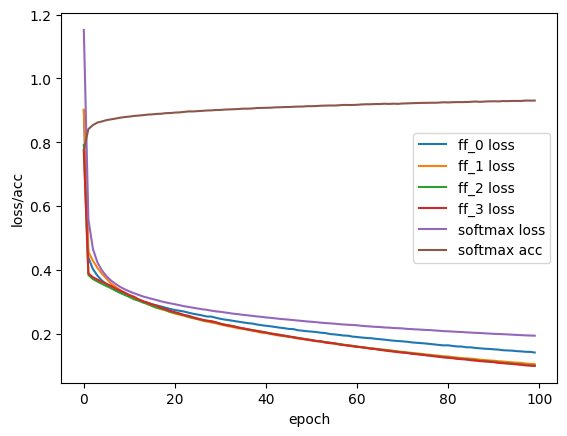

In [6]:
# Fully-connected layers

trainer = FCTrainer(
    train_set=train_set,
    ff_dims=[784, 2000, 2000, 2000, 2000],
    out_dim=10,
    threshold=10,
    lr=0.001,
    batch_size=1000,
    epochs=100,
    dropout=0,
    device='cuda:0'
    )

# train
trainer.train()

# test
trainer.test(test_set)

# loss / acc
plt.xlabel('epoch')
plt.ylabel('loss/acc')
for i, row in enumerate(trainer.ffnn_his):
  plt.plot(row, label=f'ff_{i} loss')
plt.plot(trainer.softmax_his['loss'], label='softmax loss')
plt.plot(trainer.softmax_his['acc'], label='softmax acc')
plt.legend()

Create negative datas


100%|██████████| 60000/60000 [00:23<00:00, 2584.39it/s]



[Start training FF-Layers]
Training 0 ff-layer


100%|██████████| 60/60 [00:45<00:00,  1.32it/s, Loss=0.503]


Training 1 ff-layer


100%|██████████| 60/60 [00:50<00:00,  1.18it/s, Loss=0.123]


Training 2 ff-layer


100%|██████████| 60/60 [00:53<00:00,  1.12it/s, Loss=0.191]



[Start training Softmax-Layer]


100%|██████████| 60/60 [00:34<00:00,  1.75it/s, Loss=0.262, Acc=0.902]

[Test]
test error:  0.14090001583099365


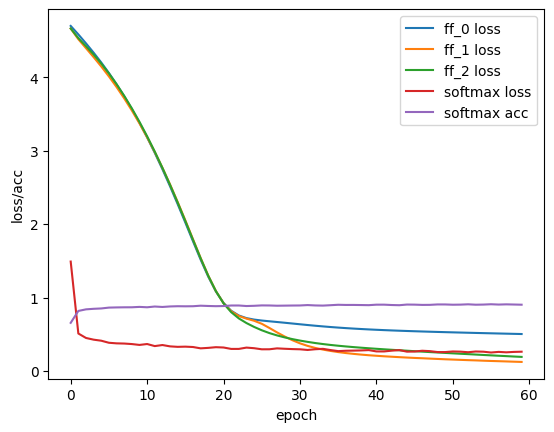

In [7]:
# Local receptive field without weight sharing

trainer = RFTrainer(
    train_set=train_set,
    out_channel_list=[128, 220, 512],
    input_shape_list=[(1, 28, 28), (128, 4, 4), (220, 3, 3)], 
    kernel_size_list=[(10, 10), (2, 2), (2, 2)], 
    strides_list=[(6, 6), (1, 1), (1, 1)],
    out_dim=10,
    threshold=10, 
    lr=0.001, 
    batch_size=1000, 
    epochs=60, 
    dropout=0, 
    device='cuda:0'
    )

trainer.train()

trainer.test(test_set)

plt.xlabel('epoch')
plt.ylabel('loss/acc')
for i, row in enumerate(trainer.ffnn_his):
  plt.plot(row, label=f'ff_{i} loss')
plt.plot(trainer.softmax_his['loss'], label='softmax loss')
plt.plot(trainer.softmax_his['acc'], label='softmax acc')
plt.legend()